/Users/abhaysobhanan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/var/folders/96/pbsq_6xd5l3g_qnhn_6fs8cc0000gn/T/ipykernel_38340/2208791756.py:85: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  colors_themes = plt.cm.viridis(pd.np.linspace(0.4, 0.9, len(theme_df)))
/var/folders/96/pbsq_6xd5l3g_qnhn_6fs8cc0000gn/T/ipykernel_38340/2208791756.py:97: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  colors_venues = plt.cm.magma(pd.np.linspace(0.3, 0.8, len(venue_counts)))


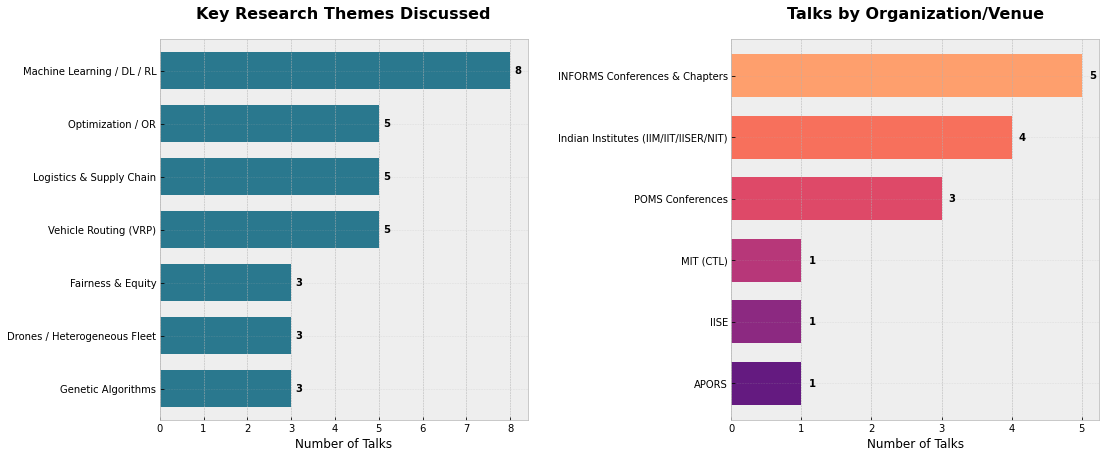

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter

# ---------------------------------------------------------
# 1. DATA ENTRY
# ---------------------------------------------------------
# I have manually transcribed the data from your screenshots below.

data = [
    # Conference Presentations
    {"Title": "Towards Scalable and Optimal Routing: A Genetic Algorithm Enhanced with Neural Cost Prediction", "Venue": "POMS India (IIM Sambalpur)", "Year": 2025, "Type": "Conference"},
    {"Title": "A Deep Reinforcement Learning Framework for Adaptive Real-Time Order Picking", "Venue": "POMS India (IIM Sambalpur)", "Year": 2025, "Type": "Conference"},
    {"Title": "A Hybrid Genetic Algorithm for the Rural Postman Problem with Multiple Trucks and Drones", "Venue": "APORS (Hong Kong PolyU)", "Year": 2025, "Type": "Conference"},
    {"Title": "Towards Equitable Workload Distribution in Last-Mile Delivery for the Gig Economy", "Venue": "INFORMS (Seattle)", "Year": 2024, "Type": "Conference"},
    {"Title": "A branch-and-price algorithm for emergency humanitarian logistics with a mixed truck-drone fleet", "Venue": "IISE Annual Conference (Montreal)", "Year": 2024, "Type": "Conference"},
    {"Title": "Optimizing Fairness and Efficiency in Heterogeneous Fleet Open Vehicle Routing Problem", "Venue": "POMS Annual (Minneapolis)", "Year": 2024, "Type": "Conference"},
    {"Title": "Solving Large-Scale Multi-Depot Vehicle Routing Problems via Decomposition and Deep Learning", "Venue": "INFORMS T&L (Chicago)", "Year": 2023, "Type": "Conference"},
    {"Title": "Solving the Multi-Depot Vehicle Routing Problem by a Genetic Algorithm with Learning to Evaluate Individuals", "Venue": "INFORMS Annual (Indianapolis)", "Year": 2022, "Type": "Conference"},
    {"Title": "Dynamic Allocation of E-commerce Orders to Order-fulfillment Centers under Disruptions", "Venue": "ORSI (IIM Ahmedabad)", "Year": 2019, "Type": "Conference"},
    {"Title": "Integrated TOPSIS-AHP MCDM using possibility mean and variance in type-2 fuzzy environment", "Venue": "Intl Conf Math (IIT Kharagpur)", "Year": 2018, "Type": "Conference"},
    
    # Invited Talks
    {"Title": "Machine Learning-Driven Logistics Optimization", "Venue": "IISER Thiruvananthapuram", "Year": 2026, "Type": "Invited"},
    {"Title": "Towards Equitable Workload Distribution in Last-Mile Delivery for the Gig Economy", "Venue": "MIT Center for Transportation & Logistics", "Year": 2025, "Type": "Invited"},
    
    # Tutorial Talks
    {"Title": "Machine Learning-Driven Logistics Optimization", "Venue": "NIT Calicut", "Year": 2025, "Type": "Tutorial"},
    {"Title": "Introduction to Machine Learning Models", "Venue": "INFORMS Student Chapter (USF)", "Year": 2024, "Type": "Tutorial"},
    {"Title": "Attention Networks for Combinatorial Optimization", "Venue": "INFORMS Student Chapter (USF)", "Year": 2023, "Type": "Tutorial"},
]

df = pd.DataFrame(data)

# ---------------------------------------------------------
# 2. DATA PROCESSING FOR TOPICS
# ---------------------------------------------------------
# We will define keywords and count their occurrence in titles to find "Themes"
keywords_map = {
    "Machine Learning / DL / RL": ["Neural", "Deep Reinforcement", "Deep Learning", "Learning", "Attention Networks"],
    "Vehicle Routing (VRP)": ["Routing", "VRP", "Vehicle Routing", "Rural Postman"],
    "Genetic Algorithms": ["Genetic Algorithm"],
    "Logistics & Supply Chain": ["Logistics", "Order Picking", "E-commerce", "Order-fulfillment", "Supply Chain"],
    "Fairness & Equity": ["Equitable", "Fairness", "Workload Distribution"],
    "Drones / Heterogeneous Fleet": ["Drones", "Truck-drone", "Fleet"],
    "Optimization / OR": ["Optimization", "Branch-and-price", "MCDM", "TOPSIS", "AHP"]
}

theme_counts = Counter()

for title in df['Title']:
    # Check which themes are present in each title
    for theme, keywords in keywords_map.items():
        if any(k.lower() in title.lower() for k in keywords):
            theme_counts[theme] += 1

# Convert to DataFrame for plotting
theme_df = pd.DataFrame.from_dict(theme_counts, orient='index', columns=['Count']).sort_values('Count', ascending=True)

# ---------------------------------------------------------
# 3. DATA PROCESSING FOR VENUES
# ---------------------------------------------------------
# Simplify venue names to main organizations for cleaner plotting
def simplify_venue(v):
    if "INFORMS" in v: return "INFORMS Conferences & Chapters"
    if "POMS" in v: return "POMS Conferences"
    if "IIM" in v or "IIT" in v or "IISER" in v or "NIT" in v: return "Indian Institutes (IIM/IIT/IISER/NIT)"
    if "MIT" in v: return "MIT (CTL)"
    if "IISE" in v: return "IISE"
    if "APORS" in v: return "APORS"
    return "Other International"

df['Organization'] = df['Venue'].apply(simplify_venue)
venue_counts = df['Organization'].value_counts().sort_values(ascending=True)

# ---------------------------------------------------------
# 4. PLOTTING
# ---------------------------------------------------------
# Set a professional style
plt.style.use('bmh') # Clean, readable style
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# --- Plot 1: Research Themes ---
colors_themes = plt.cm.viridis(pd.np.linspace(0.4, 0.9, len(theme_df)))
theme_df.plot(kind='barh', ax=ax1, color=colors_themes, legend=False, width=0.7)
ax1.set_title('Key Research Themes Discussed', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Number of Talks', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Add counts to ends of bars
for i, v in enumerate(theme_df['Count']):
    ax1.text(v + 0.1, i, str(v), color='black', va='center', fontweight='bold')

# --- Plot 2: Venues / Organizations ---
# We use a distinct color palette for venues
colors_venues = plt.cm.magma(pd.np.linspace(0.3, 0.8, len(venue_counts)))
venue_counts.plot(kind='barh', ax=ax2, color=colors_venues, width=0.7)
ax2.set_title('Talks by Organization/Venue', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Number of Talks', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

# Add counts to ends of bars
for i, v in enumerate(venue_counts):
    ax2.text(v + 0.1, i, str(v), color='black', va='center', fontweight='bold')

plt.tight_layout(pad=3.0)
plt.savefig('talks_visuals.png', dpi=300, bbox_inches='tight')
plt.show()

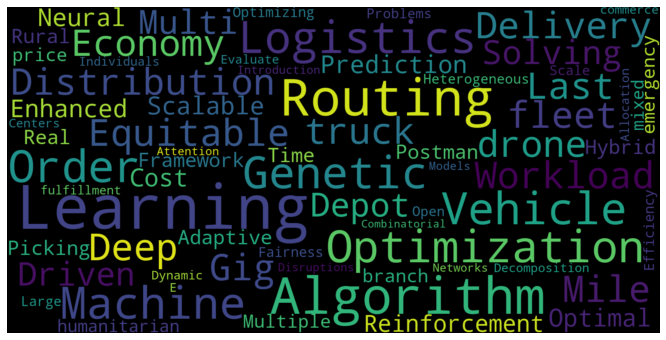

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import random

# ---------------------------------------------------------
# 1. DATA ENTRY
# ---------------------------------------------------------
# Titles of your talks
titles = [
    "Towards Scalable and Optimal Routing: A Genetic Algorithm Enhanced with Neural Cost Prediction",
    "A Deep Reinforcement Learning Framework for Adaptive Real-Time Order Picking",
    "A Hybrid Genetic Algorithm for the Rural Postman Problem with Multiple Trucks and Drones",
    "Towards Equitable Workload Distribution in Last-Mile Delivery for the Gig Economy",
    "A branch-and-price algorithm for emergency humanitarian logistics with a mixed truck-drone fleet",
    "Optimizing Fairness and Efficiency in Heterogeneous Fleet Open Vehicle Routing Problem",
    "Solving Large-Scale Multi-Depot Vehicle Routing Problems via Decomposition and Deep Learning",
    "Solving the Multi-Depot Vehicle Routing Problem by a Genetic Algorithm with Learning to Evaluate Individuals",
    "Dynamic Allocation of E-commerce Orders to Order-fulfillment Centers under Disruptions",
    "Machine Learning-Driven Logistics Optimization",
    "Towards Equitable Workload Distribution in Last-Mile Delivery for the Gig Economy",
    "Machine Learning-Driven Logistics Optimization",
    "Introduction to Machine Learning Models",
    "Attention Networks for Combinatorial Optimization"
]

# List of Venues / Institutes
# You can duplicate entries to increase their size in the plot
venues = [
    "IIM Sambalpur", "IIM Sambalpur", 
    "Hong Kong PolyU", 
    "INFORMS (Seattle)", 
    "IISE (Montreal)", 
    "POMS (Minneapolis)", 
    "INFORMS (Chicago)", 
    "INFORMS (Indianapolis)", 
    "IIM Ahmedabad", 
    "IIT Kharagpur", 
    "IISER TVM", 
    "MIT CTL", 
    "NIT Calicut", 
    "USF (INFORMS Chapter)", "USF (INFORMS Chapter)"
]

# ---------------------------------------------------------
# 2. FIGURE 1: TOPIC WORD CLOUD
# ---------------------------------------------------------
text_combined = " ".join(titles)

# Add custom stopwords to remove generic academic terms
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["Towards", "A", "The", "for", "in", "of", "and", "with", "via", "to", "by", "under", "using", "Problem"])

wc = WordCloud(
    width=1600, height=800,
    # background_color='white',
    stopwords=custom_stopwords,
    # colormap='viridis', 
    min_font_size=15,
    max_font_size=150,
    prefer_horizontal=0.9
).generate(text_combined)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
# plt.title("Key Research Themes", fontsize=20, pad=20)
plt.savefig('research_talks_wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

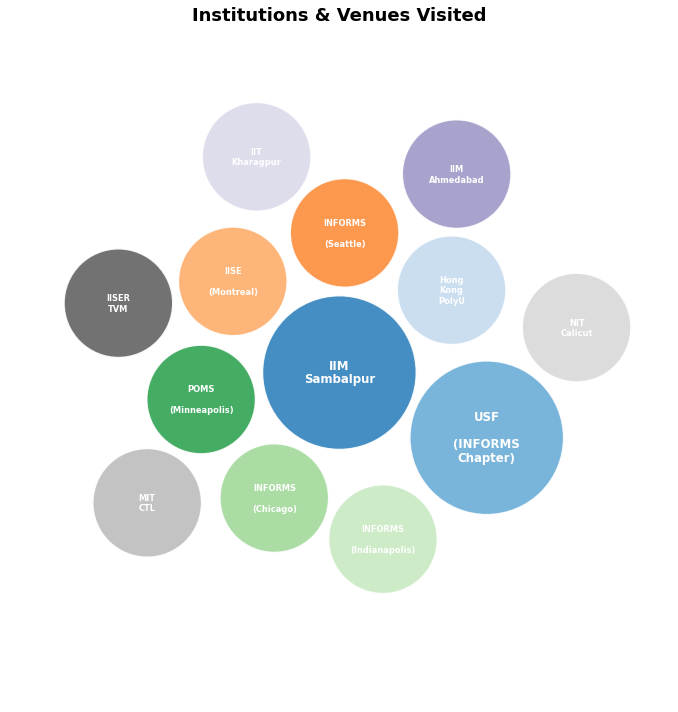

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter

# ---------------------------------------------------------
# 1. DATA PREPARATION
# ---------------------------------------------------------
venues = [
    "IIM Sambalpur", "IIM Sambalpur", 
    "Hong Kong PolyU", 
    "INFORMS (Seattle)", 
    "IISE (Montreal)", 
    "POMS (Minneapolis)", 
    "INFORMS (Chicago)", 
    "INFORMS (Indianapolis)", 
    "IIM Ahmedabad", 
    "IIT Kharagpur", 
    "IISER TVM", 
    "MIT CTL", 
    "NIT Calicut", 
    "USF (INFORMS Chapter)", "USF (INFORMS Chapter)"
]

# Count frequencies
counts = Counter(venues)
df = pd.DataFrame.from_dict(counts, orient='index', columns=['count']).reset_index()
df.columns = ['venue', 'count']
df = df.sort_values('count', ascending=False) # Important for packing

# ---------------------------------------------------------
# 2. CIRCLE PACKING ALGORITHM
# ---------------------------------------------------------
# This function calculates x,y positions to pack circles tightly
def pack_circles(data):
    # Scale radius based on count (sqrt ensures area is proportional)
    # The multiplier (15) adjusts the overall size of bubbles
    data['radius'] = np.sqrt(data['count']) * 15 
    
    circles = []
    for i, row in data.iterrows():
        r = row['radius']
        
        # Place the first circle at the center
        if not circles:
            circles.append({'x': 0, 'y': 0, 'r': r, 'label': row['venue']})
            continue
            
        # For subsequent circles, spiral out to find the first spot that doesn't overlap
        # We search along a spiral path: x = d * cos(theta), y = d * sin(theta)
        placed = False
        d = r + circles[0]['r'] # Start searching just outside the center
        theta = 0
        delta_d = 0.5 # Step size for distance
        delta_theta = 0.15 # Step size for angle
        
        while not placed:
            x = d * np.cos(theta)
            y = d * np.sin(theta)
            
            # Check for overlap with all existing circles
            overlap = False
            for c in circles:
                dist = np.sqrt((x - c['x'])**2 + (y - c['y'])**2)
                # We add a small padding (+ 2) so they don't touch perfectly
                if dist < (r + c['r'] + 2): 
                    overlap = True
                    break
            
            if not overlap:
                circles.append({'x': x, 'y': y, 'r': r, 'label': row['venue']})
                placed = True
            else:
                # Move further out along spiral
                theta += delta_theta
                d += delta_d * 0.05 # Increase distance slowly
                
    return pd.DataFrame(circles)

packed_data = pack_circles(df)

# ---------------------------------------------------------
# 3. PLOTTING
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
ax.axis('off') # Hide axes

# Define a nice color palette
colors = plt.cm.tab20c(np.linspace(0, 1, len(packed_data)))

# Draw Circles
for i, row in packed_data.iterrows():
    circle = plt.Circle((row['x'], row['y']), row['r'], 
                        color=colors[i], alpha=0.9, linewidth=1.5, ec='white')
    ax.add_patch(circle)
    
    # Add Text (Break long lines)
    label_text = row['label'].replace(" ", "\n").replace("(", "\n(").replace("/", "/\n")
    
    # Dynamic font size based on radius
    font_size = row['r'] * 0.55 
    
    ax.text(row['x'], row['y'], label_text, 
            ha='center', va='center', 
            fontsize=font_size, 
            color='white', fontweight='bold')

# Adjust limits to fit all circles with some margin
limit = max(packed_data['x'].abs().max(), packed_data['y'].abs().max()) + max(packed_data['r']) + 5
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)

plt.title("Venues", fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
# plt.savefig('venue_bubbles.png', dpi=300, bbox_inches='tight') # Uncomment to save

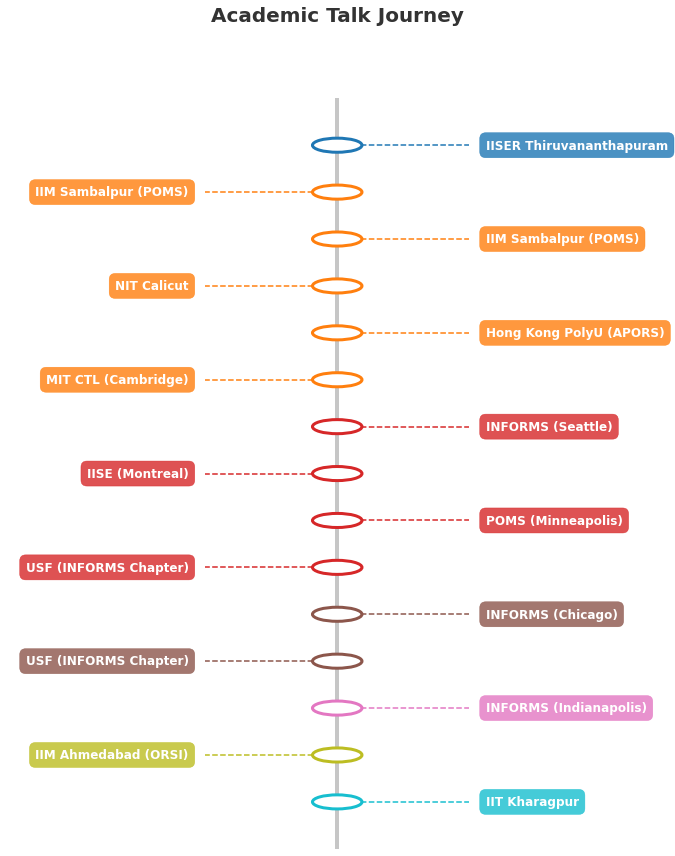

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ---------------------------------------------------------
# 1. UPDATED DATA WITH YEARS
# ---------------------------------------------------------
data = [
    {"Venue": "IISER Thiruvananthapuram", "Year": 2026, "Type": "Invited"},
    {"Venue": "IIM Sambalpur (POMS)", "Year": 2025, "Type": "Conference"},
    {"Venue": "IIM Sambalpur (POMS)", "Year": 2025, "Type": "Conference"},
    {"Venue": "NIT Calicut", "Year": 2025, "Type": "Tutorial"},
    {"Venue": "Hong Kong PolyU (APORS)", "Year": 2025, "Type": "Conference"},
    {"Venue": "MIT CTL (Cambridge)", "Year": 2025, "Type": "Invited"},
    {"Venue": "INFORMS (Seattle)", "Year": 2024, "Type": "Conference"},
    {"Venue": "IISE (Montreal)", "Year": 2024, "Type": "Conference"},
    {"Venue": "POMS (Minneapolis)", "Year": 2024, "Type": "Conference"},
    {"Venue": "USF (INFORMS Chapter)", "Year": 2024, "Type": "Tutorial"},
    {"Venue": "INFORMS (Chicago)", "Year": 2023, "Type": "Conference"},
    {"Venue": "USF (INFORMS Chapter)", "Year": 2023, "Type": "Tutorial"},
    {"Venue": "INFORMS (Indianapolis)", "Year": 2022, "Type": "Conference"},
    {"Venue": "IIM Ahmedabad (ORSI)", "Year": 2019, "Type": "Conference"},
    {"Venue": "IIT Kharagpur", "Year": 2018, "Type": "Conference"}
]

df = pd.DataFrame(data)
# Sort by year descending (Newest on top)
df = df.sort_values(by=['Year'], ascending=False).reset_index(drop=True)

# ---------------------------------------------------------
# 2. SETUP PLOT
# ---------------------------------------------------------
# Create figure
fig, ax = plt.subplots(figsize=(10, 12))
ax.set_xlim(-2, 2)
ax.set_ylim(-1, len(df) + 1)
ax.axis('off')  # Turn off standard axes

# Draw the central timeline "spine"
ax.vlines(0, -1, len(df), color='#444444', linewidth=4, alpha=0.3)

# ---------------------------------------------------------
# 3. DRAW NODES AND LABELS
# ---------------------------------------------------------
# Define colors for years to make them visually distinct
unique_years = df['Year'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_years)))
year_color_map = dict(zip(unique_years, colors))

# Iterate through data to plot
# "side" variable flips between -1 (left) and 1 (right)
for i, row in df.iterrows():
    year = row['Year']
    venue = row['Venue']
    
    # Calculate Y position (just the index)
    y_pos = len(df) - i - 1
    
    # Alternate sides: Even index -> Right (1), Odd index -> Left (-1)
    side = 1 if i % 2 == 0 else -1
    
    # 1. Draw the Year Bubble (Only if it's the first time we see this year, or simple repeat)
    # Actually, let's just color the node by year
    c = year_color_map[year]
    
    # Draw connection line from spine to node
    ax.plot([0, side * 0.8], [y_pos, y_pos], color=c, linewidth=1.5, linestyle='--')
    
    # Draw the Node (Circle)
    circle = plt.Circle((0, y_pos), 0.15, color='white', ec=c, linewidth=3, zorder=10)
    ax.add_patch(circle)
    
    # Add Year text inside the circle (on the spine)
    ax.text(0, y_pos, str(year), fontsize=9, ha='center', va='center', fontweight='bold', color='#333333')

    # Draw the Text Box (Venue Name)
    # We use a fancy box style
    bbox_props = dict(boxstyle="round,pad=0.5", fc=c, ec=c, alpha=0.8)
    
    ax.text(side * 0.9, y_pos, venue, 
            ha='left' if side == 1 else 'right', 
            va='center', 
            fontsize=12, 
            fontweight='bold', 
            color='white',
            bbox=bbox_props)

# ---------------------------------------------------------
# 4. FINALIZE
# ---------------------------------------------------------
plt.title("Academic Talk Journey", fontsize=20, fontweight='bold', pad=30, color='#333333')
plt.tight_layout()
plt.show()
# plt.savefig('timeline_journey.png', dpi=300)

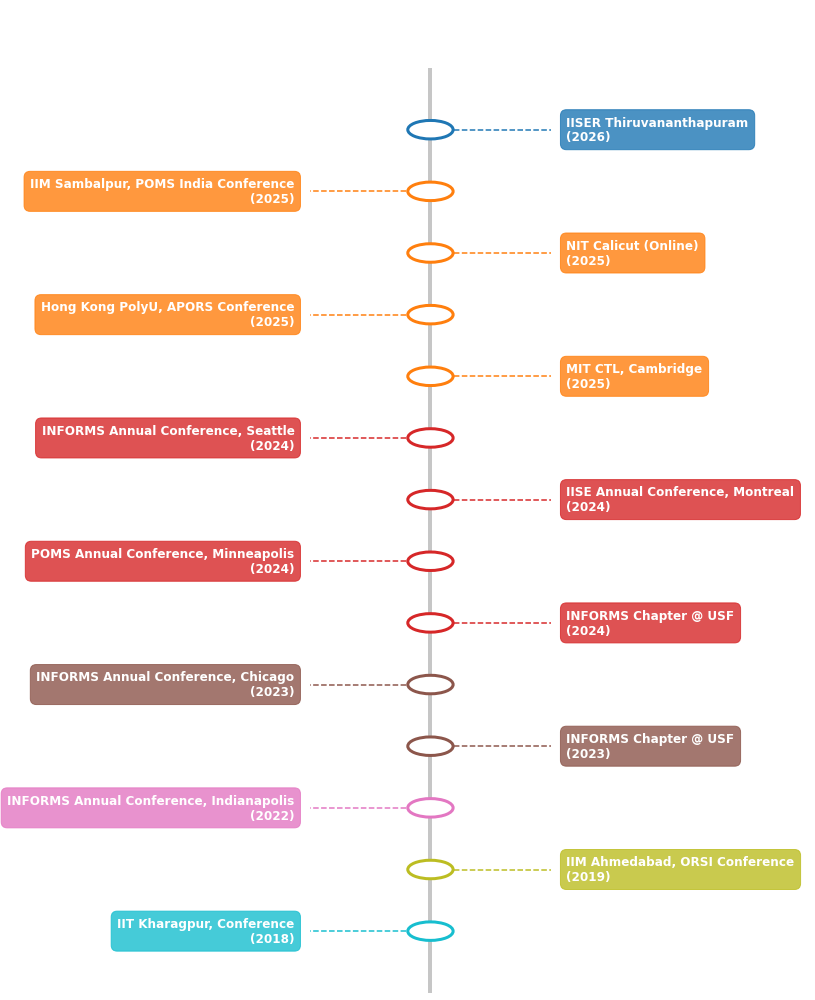

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ---------------------------------------------------------
# 1. DATA ENTRY
# ---------------------------------------------------------
data = [
    {"Venue": "IISER Thiruvananthapuram", "Year": 2026, "Type": "Invited"},
    {"Venue": "IIM Sambalpur, POMS India Conference", "Year": 2025, "Type": "Conference"},
    {"Venue": "NIT Calicut (Online)", "Year": 2025, "Type": "Tutorial"},
    {"Venue": "Hong Kong PolyU, APORS Conference", "Year": 2025, "Type": "Conference"},
    {"Venue": "MIT CTL, Cambridge", "Year": 2025, "Type": "Invited"},
    {"Venue": "INFORMS Annual Conference, Seattle", "Year": 2024, "Type": "Conference"},
    {"Venue": "IISE Annual Conference, Montreal", "Year": 2024, "Type": "Conference"},
    {"Venue": "POMS Annual Conference, Minneapolis", "Year": 2024, "Type": "Conference"},
    {"Venue": "INFORMS Chapter @ USF", "Year": 2024, "Type": "Tutorial"},
    {"Venue": "INFORMS Annual Conference, Chicago", "Year": 2023, "Type": "Conference"},
    {"Venue": "INFORMS Chapter @ USF", "Year": 2023, "Type": "Tutorial"},
    {"Venue": "INFORMS Annual Conference, Indianapolis", "Year": 2022, "Type": "Conference"},
    {"Venue": "IIM Ahmedabad, ORSI Conference", "Year": 2019, "Type": "Conference"},
    {"Venue": "IIT Kharagpur, Conference", "Year": 2018, "Type": "Conference"}
]

df = pd.DataFrame(data)
# Sort by year descending (Newest on top)
df = df.sort_values(by=['Year'], ascending=False).reset_index(drop=True)

# ---------------------------------------------------------
# 2. SETUP PLOT
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 14)) # Slightly wider to fit text
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-1, len(df) + 1)
ax.axis('off')

# Draw the central timeline "spine"
ax.vlines(0, -1, len(df), color='#444444', linewidth=4, alpha=0.3)

# ---------------------------------------------------------
# 3. DRAW NODES AND LABELS
# ---------------------------------------------------------
unique_years = df['Year'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_years)))
year_color_map = dict(zip(unique_years, colors))

for i, row in df.iterrows():
    year = row['Year']
    venue = row['Venue']
    
    y_pos = len(df) - i - 1
    side = 1 if i % 2 == 0 else -1  # Right (1) or Left (-1)
    
    c = year_color_map[year]
    
    # Connection line
    ax.plot([0, side * 0.8], [y_pos, y_pos], color=c, linewidth=1.5, linestyle='--')
    
    # Central Node (Circle)
    circle = plt.Circle((0, y_pos), 0.15, color='white', ec=c, linewidth=3, zorder=10)
    ax.add_patch(circle)
    
    # Add Year inside the circle (optional, but looks nice as an anchor)
    ax.text(0, y_pos, str(year), fontsize=9, ha='center', va='center', fontweight='bold', color='#333333')

    # ---------------------------------------------------------
    # MODIFIED: Text Box now includes the Year
    # ---------------------------------------------------------
    label_text = f"{venue}\n({year})"  # New format: Venue (Year)
    
    bbox_props = dict(boxstyle="round,pad=0.5", fc=c, ec=c, alpha=0.8)
    
    ax.text(side * 0.9, y_pos, label_text, 
            ha='left' if side == 1 else 'right', 
            va='center', 
            fontsize=12, 
            fontweight='bold', 
            color='white',
            bbox=bbox_props)

# plt.title("Venues", fontsize=20, fontweight='bold', pad=30)
plt.tight_layout()
plt.savefig('timeline_journey_with_years.png', dpi=300)
plt.show()